In [1]:
import numpy as np
from numba import jit

from py.model import *
from py.scores import *

import pandas as pd

from matplotlib import pyplot as plt

from itertools import product

import matplotlib
matplotlib.rcParams['font.sans-serif'] = "Arial Unicode MS"

In [4]:
cset = ['#4477AA', '#EE6677', '#228833', '#CCBB44', '#66CCEE', '#AA3377']
cset_muted = ['#CC6677', '#332288', '#DDCC77', '#117733', '#88CCEE', '#882255', '#44AA99', '#999933', '#AA4499', '#DDDDDD','#000000']

In [5]:
df_SR = pd.read_csv('throughput/springrank_score_curves.csv')

In [6]:
n = 8

def compute_gamma(row, power = 1): 
    beta = row.beta
    s_1 = row.s_1
    s_2 = row.s_2
    n_1 = row.n_1
    n_2 = n - n_1
    
    v_1 = np.exp(beta*(s_1**power))
    v_2 = np.exp(beta*(s_2**power))
    
    gamma_1 = np.array(v_1/(n_1*v_1 + n_2*v_2))
    gamma_2 = np.array(v_2/(n_1*v_1 + n_2*v_2))
    
    return(pd.Series([gamma_1, gamma_2], index = ['gamma_1', 'gamma_2']))

In [7]:
df_SR = pd.concat((df_SR, df_SR.apply(compute_gamma, result_type = 'expand', axis = 1)), axis = 1)

@jit(nopython=True)
def linear_feature(s):
    return(np.outer(np.ones(len(s)), s))

In [8]:
SMALL_SIZE = 8
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

/Users/philchodrow/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/philchodrow/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


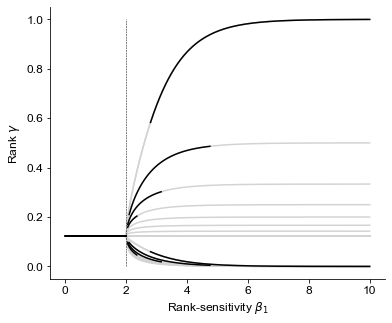

In [19]:
fig = plt.figure(figsize = (6, 5))
ax = fig.add_subplot(111)

p = df_SR.groupby(['n_1']).apply(lambda g: ax.plot(g.beta, g.gamma_1, zorder = 1, color = "lightgrey"))

df_SR['group'] = df_SR.n_1
df_SR['group'][df_SR.beta<2.00001] = -1
df_SR[df_SR.stable].groupby(['n_1', 'group']).apply(lambda g: ax.plot(g.beta, g.gamma_1, zorder = 1, color = "black"))

p = df_SR.groupby(['n_1']).apply(lambda g: ax.plot(g.beta, g.gamma_2, zorder = 1, color = "lightgrey"))

df_SR['group'] = df_SR.n_1
df_SR['group'][df_SR.beta<2.00001] = -1
df_SR[df_SR.stable].groupby(['n_1', 'group']).apply(lambda g: ax.plot(g.beta, g.gamma_2, zorder = 1, color = "black"))

ax.vlines(2, ymin = 0, ymax = 1, linewidth = .5, linestyle = 'dashed')

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set(xlabel = r'Rank-sensitivity $\beta_1$')
ax.set(ylabel = r'Rank $\gamma$')

plt.savefig('fig/springrank_bifurcation_no_sim.png', dpi = 300, bbox_inches = 'tight')